# Flight Price Prediction


# Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

# Importing necessary libraries


In [2]:
#linear algebra
import numpy as np
 
import warnings
warnings.filterwarnings('ignore')

#data processing
import pandas as pd

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

#Algorithms

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor

import joblib


In [38]:
#loading the datset
df=pd.read_excel('C:/Users/hp/OneDrive/Documents/Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


The train dataset contains the details of the prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. The dataset contains both numerical and categorical data. Here Price is the target variable and as it has continuous data, its a Regression Problem Statement where we use Regression algorithms to predict the prices of the flight tickets.



In [39]:
#checking the top5 rows
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [40]:
#checking the last 5rows
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [41]:
#checking the sample
df.sample(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
7457,IndiGo,12/06/2019,Delhi,Cochin,DEL → BOM → COK,15:00,01:30 13 Jun,10h 30m,1 stop,No info,5684
6711,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,17:10,19:40,2h 30m,non-stop,No info,3873


# EDA

In [42]:
#checking the dimensation of dataset
df.shape

(10683, 11)

In [43]:
#checking the columns
df.columns.tolist()


['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price']

In [44]:
#checking the information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Thi gives the brief about the dataset which includes indexing type,column type,few null values and memory usage.

In [45]:
#checking the datatype
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

all data are object datatype

# Feature Engineering


Working on all the columns and converting them to numeric

The columns Date_of_Journey,Arrival_Time and Dep_Time has datetime datatype but its reflecting as object. So lets convert this datatype into timestamp to use it properly for prediction.



In [46]:
# Converting Date and time columns from object type to Datetime type

df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [47]:
#Rechecking the datatype
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

We have converted object datatype into datetime datatype.

Now splitting Date_of_journey into Month and Day, and as the dataset contains only 2019 year data so no need to take year column.

In [48]:
#Extracting Day from Date_of_journey column
df['Journey_Day']=pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.day

#Extracting Day from Date_of_journey column
df['Journey_Month']=pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.month



So we have splitted the column Date_of_Journey into integer datatype , now we can drop this column as it is of no use.



In [49]:
#Dropping the column
df.drop('Date_of_Journey',axis=1,inplace=True)

In [50]:
# Duration

df['Duration']=df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

#now lets convert this column into a numeric

df['Duration']=pd.to_numeric(df['Duration'])

Extracting hours and mins from Dep_Time column and dropping Dep_Time.

In [51]:
# Extracting Hours from Dep_Time column
df['Dep_Hour']=pd.to_datetime(df['Dep_Time']).dt.hour

# Extracting Minutes from Dep_Time column
df['Dep_Min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [52]:
# Dropping Dep_Time column
df.drop("Dep_Time",axis=1,inplace=True)

Similarly extracting hours and mins from Arrival_Time column and dropping that column.

In [53]:
# Extracting Arrival_Hour from Arrival_Time column
df['Arrival_Hour']=pd.to_datetime(df['Arrival_Time']).dt.hour

# Extracting Arrival_Min from Arrival_Time column
df['Arrival_Min']=pd.to_datetime(df['Arrival_Time']).dt.minute

# Dropping Arruval_Time column
df.drop("Arrival_Time",axis=1,inplace=True)

In [54]:
# Lets check dataframe now
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,3,1,16,50,21,35


In [55]:
#Again checking the dimenstion of dataset
df.shape

(10683, 14)

Now the dataset has 10683 rows and 14 columns.



In [56]:
#Checking the value counts for each columms
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                              

From the above list of unique values,we can observe some repeated categories in some columns. Lets replace them.

In [57]:
#checking the unique values
df.nunique()

Airline              12
Source                5
Destination           6
Route               128
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
Journey_Day           9
Journey_Month         7
Dep_Hour             24
Dep_Min              12
Arrival_Hour         24
Arrival_Min          12
dtype: int64

Remarks: In the above cell, we can see the number of unique values each column of our dataset contains.



In [58]:
#checking the null values
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

2missing value are present

few null values are present

<AxesSubplot:>

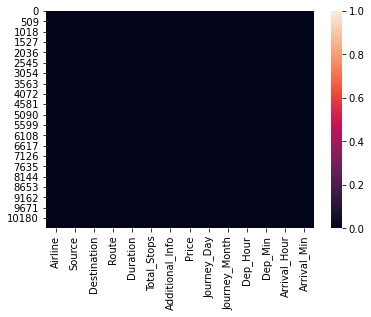

In [59]:
#heatmap for null values
sns.heatmap(df.isnull())

2 null values are present in our dataset 

# Handling Null values using imputation techniques.


In [60]:
# filling the null values with mode

df['Route']=df['Route'].fillna(df['Route'].mode()[0])
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [61]:
#Checkin g for missing values afer filling
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

No null values present

<AxesSubplot:>

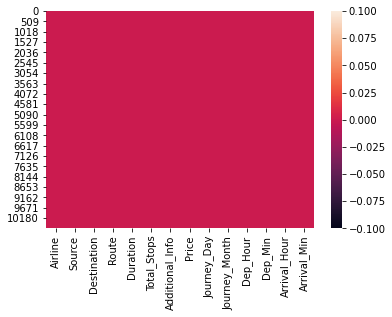

In [62]:
#checking on heatmap
sns.heatmap(df.isnull())

no missing values

# Statistical Analysis

In [63]:
df.describe()


,Duration,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,643.093232,9087.064121,12.682205,5.534775,12.490686,24.411214,13.348778,24.690630
std,507.862001,4611.359167,8.803701,2.987489,5.748650,18.767980,6.859125,16.506036
min,5.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,170.000000,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,520.000000,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,930.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,2860.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000


This gives the statistical information of the dataset. The summary looks perfect since there is no negative/invali values present. It gives the summary of numerical data.\ From the above description we can observe the following things.

.The counts of all columns are same which means ther are no missing values present int he dataset.

.The mean value is greater than the median(50%) in the columns Price,Journey_Day,Duration and Dep_Hour so we can say they are skewed to right.

.The median(50%) is bit greater than mean in Dep_Min,Arrival_Hour and Arrival_Min which means they are skewed to left.

.From the description we can say the minimum price of the flight tickets is Rs.1759 and maximum price is Rs.79512 and the mean is 9087.

.Also there is a huge difference in maximum and 75% percentile in the columns Price, Arrival_Min which leads to outlies in thoe columns.

.The std of target variable is high which means it has high rate of dispersion.


# Description Visualization


<AxesSubplot:>

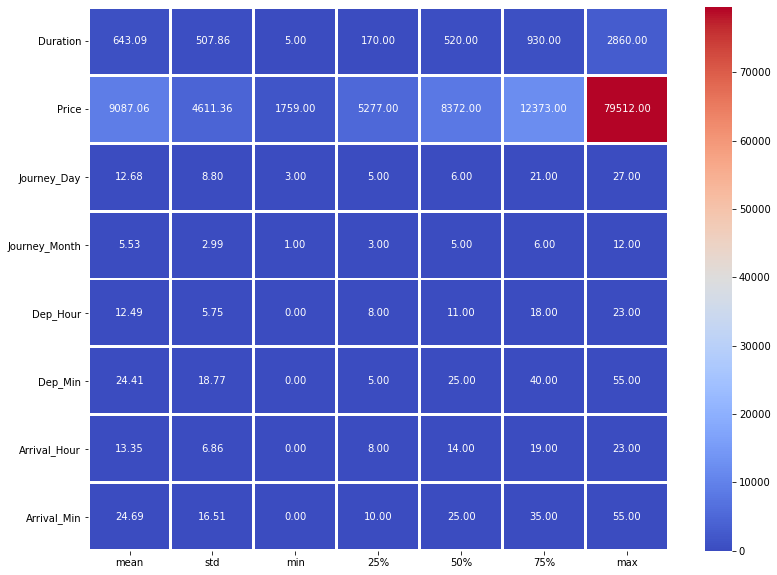

In [64]:
plt.figure(figsize=(13,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth = 2, annot = True, fmt = '.2f',cmap='coolwarm')


# Lets separate numerical and categorical column.


In [65]:
#Checking categrocial column
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [66]:
#checking for numerial column
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        numerical_col.append(i)
print(numerical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


# Data Visualization


# Univariate Analysis

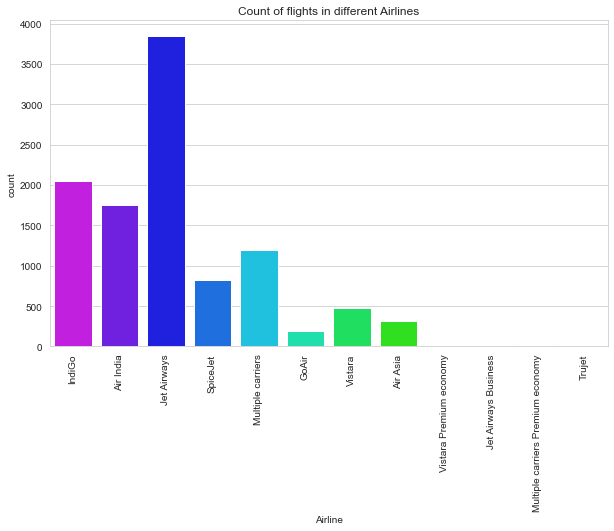

In [67]:
#countplot for various airline presnet in dataset

plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(df['Airline'],palette='gist_rainbow_r')
plt.title('Count of flights in different Airlines')
plt.xticks(rotation=90)
plt.show()

Jet Airways flights has high counts whereas Trujet and GoAir has the least counts.



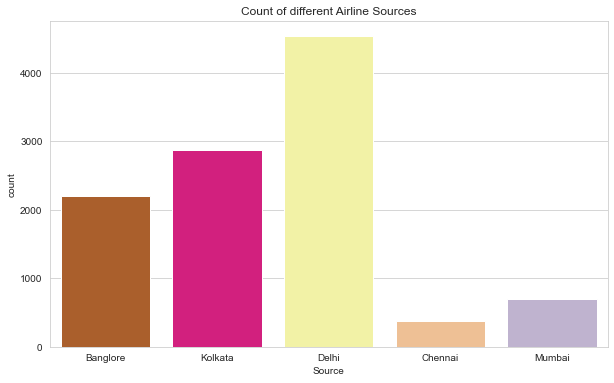

In [137]:
# Visualizing the various Source from which place the service begins

plt.figure(figsize=(10,6))
sns.countplot(df['Source'],palette='Accent_r')
plt.title('Count of different Airline Sources')
plt.show()

The majority of Airline source is from Delhi while the least is from Chennai.



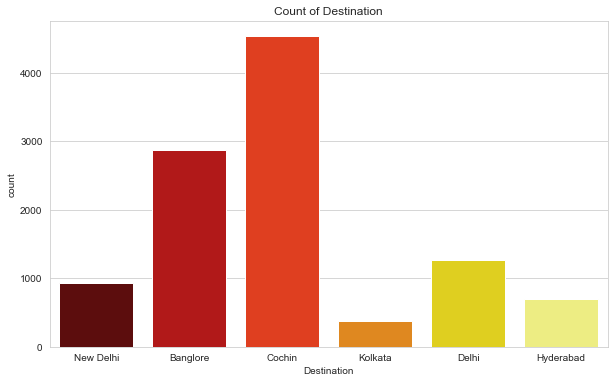

In [198]:
# Visualizing the destination from which place the service ends

plt.figure(figsize=(10,6))
sns.countplot(df['Destination'],palette='hot')
plt.title('Count of Destination')
plt.show()

The Cochin destination has highest counts. Most of the flights services ends in Cochin destination.



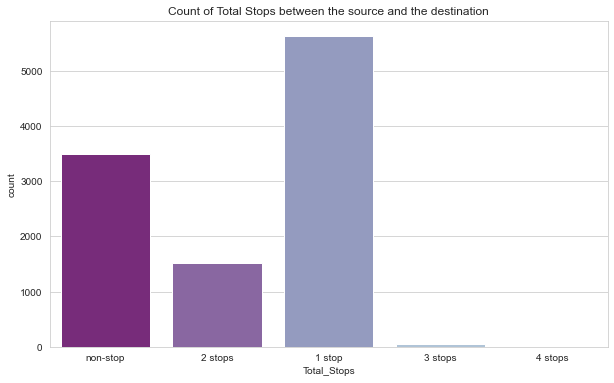

In [150]:
# Visualizing the Total Stops between the source and the destination

plt.figure(figsize=(10,6))
sns.countplot(df['Total_Stops'],palette='BuPu_r')
plt.title("Count of Total Stops between the source and the destination")
plt.show()

Majority of flights has 1 stop between the source and destination, followed by non stop. No flights have 4 stops between the source and destination.



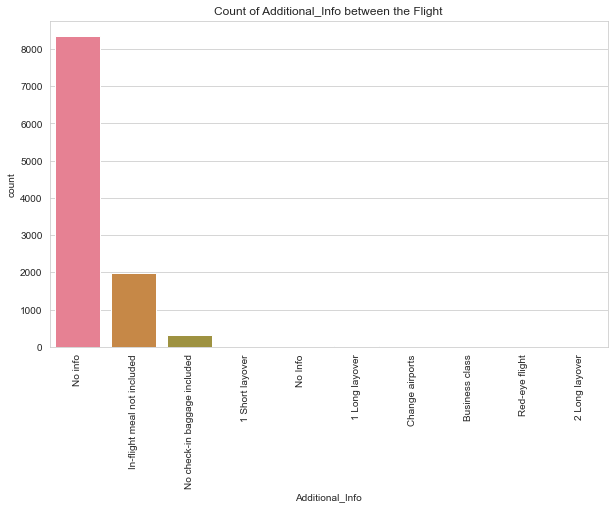

In [157]:
# Visualizing the Additional Information about the flight

plt.figure(figsize=(10,6))
sns.countplot(df['Additional_Info'],palette='husl')
plt.title("Count of Additional_Info between the Flight")
plt.xticks(rotation=90)
plt.show()

There is no much information about the flights that we can see in the plot.



Pie plot for the column: Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


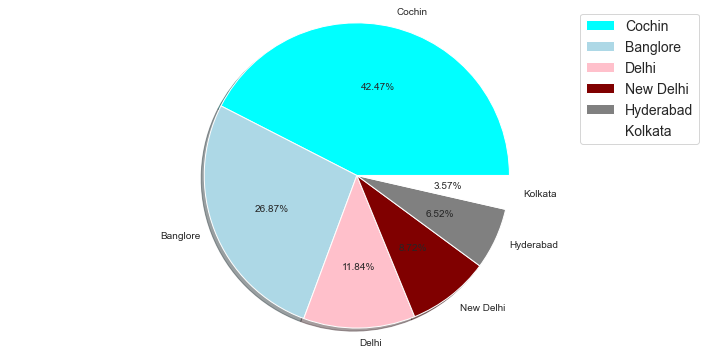



Pie plot for the column: Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


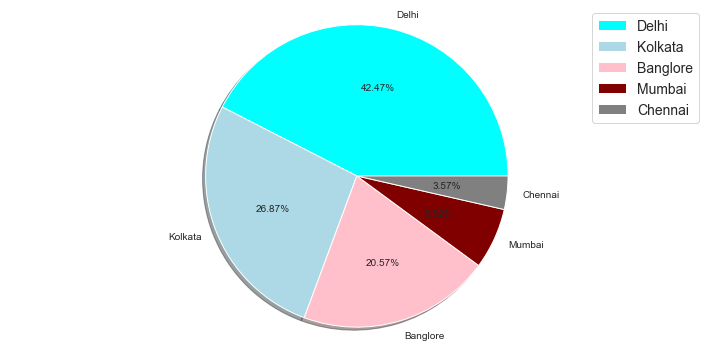



Pie plot for the column: Journey_Day
6     2166
5     1392
3     1361
27    1130
21    1111
24    1052
15     984
18     832
4      655
Name: Journey_Day, dtype: int64


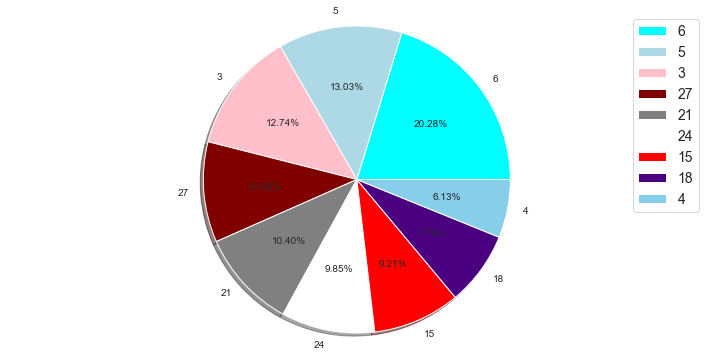



Pie plot for the column: Journey_Month
6     2536
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: Journey_Month, dtype: int64


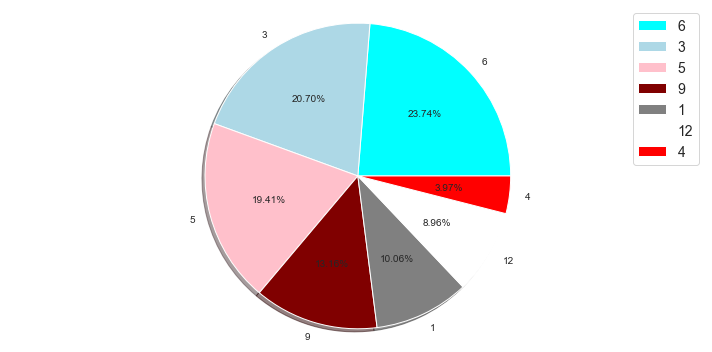

In [213]:
#pie plots
def generate_pie(i):
    plt.figure(figsize=(10,5))
    colors=['cyan','lightblue','pink','maroon','gray','white','red','indigo','skyblue']
    plt.pie(i.value_counts(),labels=i.value_counts().index,autopct='%1.2f%%',shadow=True,colors=colors)
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

cols1 = ['Destination', 'Source', 'Journey_Day','Journey_Month']

plotnumber=1
for j in df[cols1]:
    print(f'Pie plot for the column:',j)
    print(df[j].value_counts())
    generate_pie(df[j])
    print("\n")

These pie plots showing the percentage of the columns

# Distribution of skewness


<AxesSubplot:title={'center':'Distribution of Arrival_Min'}, xlabel='Arrival_Min', ylabel='Density'>

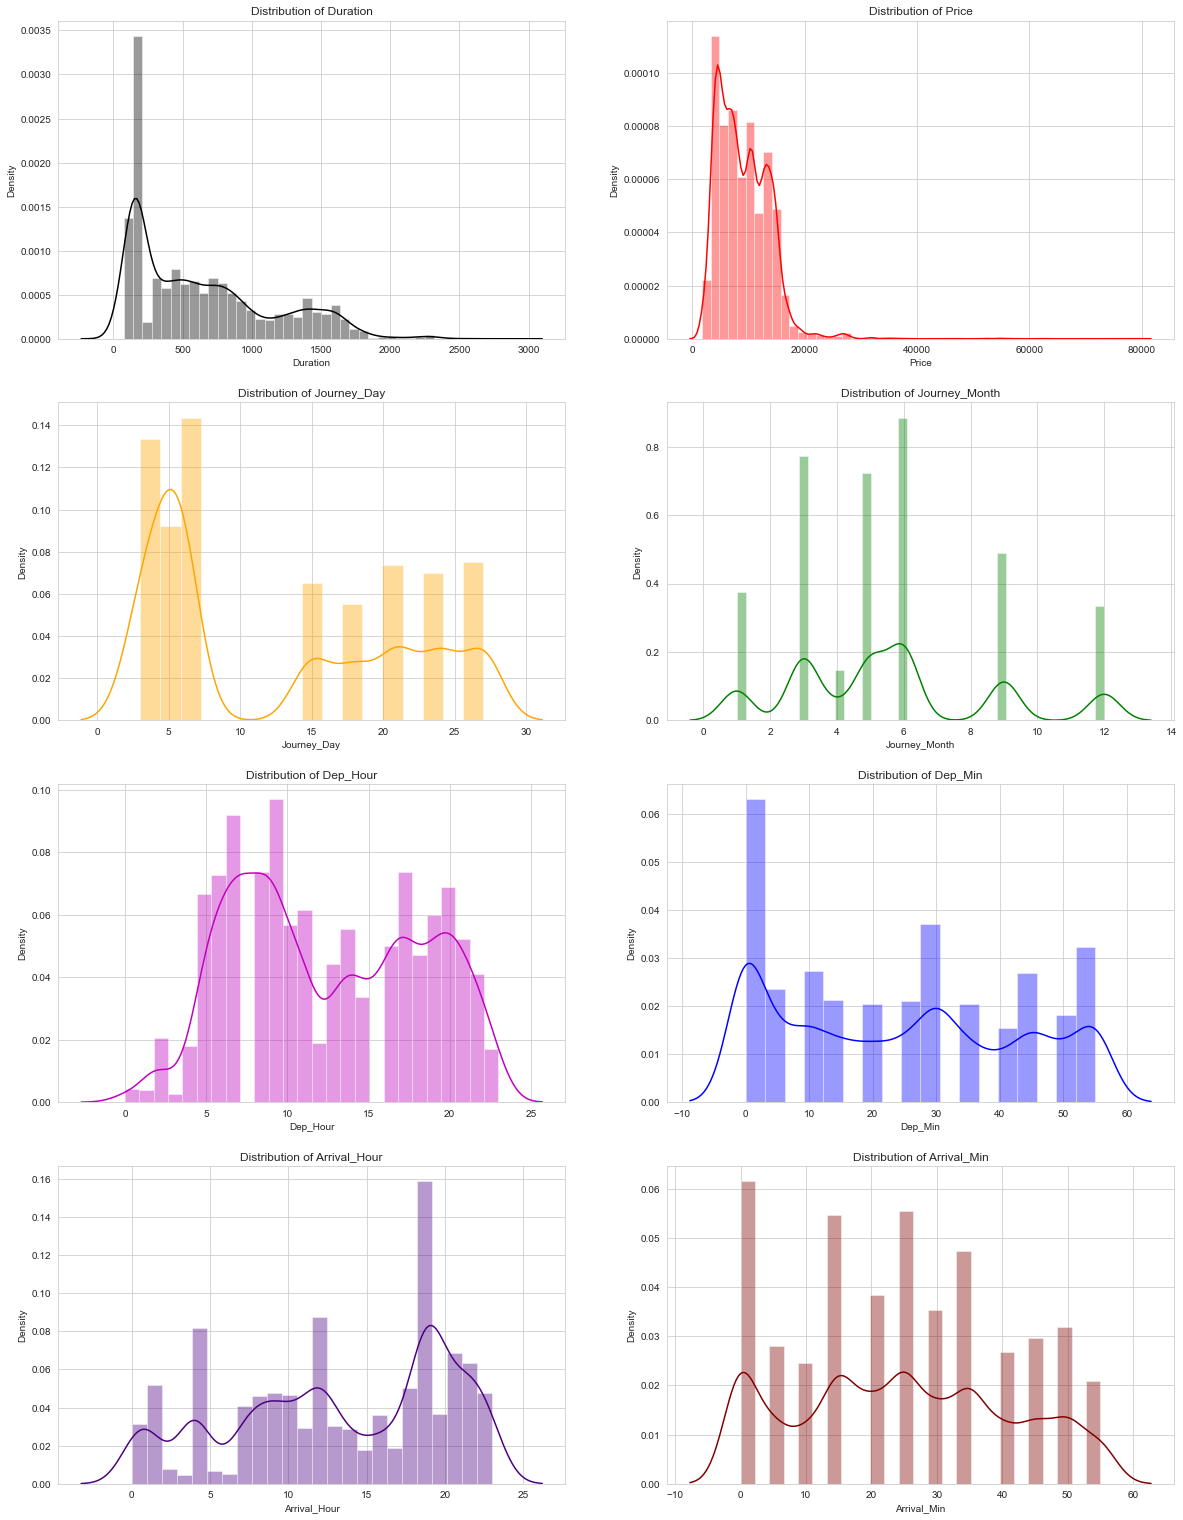

In [166]:
plt.figure(figsize=(20,55))
plt.subplot(8,2,1)
plt.title('Distribution of Duration')
sns.distplot(df['Duration'],color='black')
plt.subplot(8,2,2)
plt.title('Distribution of Price')
sns.distplot(df['Price'],color='r')
plt.subplot(8,2,3)
plt.title('Distribution of Journey_Day')
sns.distplot(df['Journey_Day'],color='orange')
plt.subplot(8,2,4)
plt.title('Distribution of Journey_Month')
sns.distplot(df['Journey_Month'],color='green')
plt.subplot(8,2,5)
plt.title('Distribution of Dep_Hour')
sns.distplot(df['Dep_Hour'],color='m')
plt.subplot(8,2,6)
plt.title('Distribution of Dep_Min')
sns.distplot(df['Dep_Min'],color='b')
plt.subplot(8,2,7)
plt.title('Distribution of Arrival_Hour')
sns.distplot(df['Arrival_Hour'],color='indigo')
plt.subplot(8,2,8)
plt.title('Distribution of Arrival_Min')
sns.distplot(df['Arrival_Min'],color='maroon')


From the distribution plot we can observe that the data is not normally distributed in some columns and some columns are almost normal but have no proper bell shape curve. The Journey_Month, Duration and Price columns are skewed to right as mean is more than the median.

# Bivariate Analysis


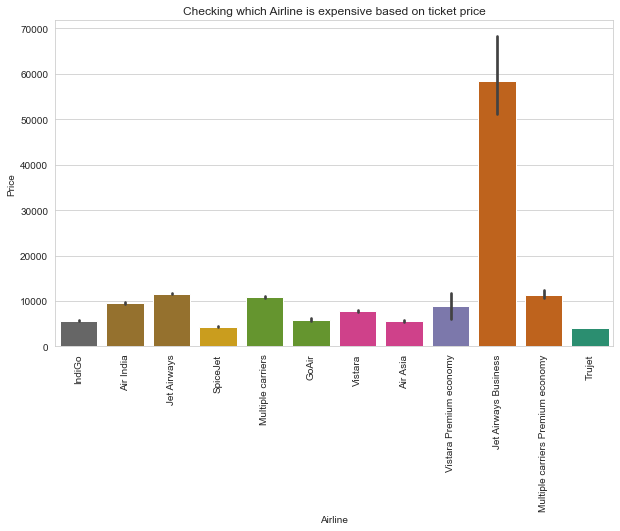

In [175]:
# Lets check which Airline is expensive based on Price of tickets

plt.figure(figsize=(10,6))
sns.barplot(df['Airline'],df['Price'],data=df,palette='Dark2_r')
plt.title("Checking which Airline is expensive based on ticket price")
plt.xticks(rotation=90)
plt.show()

The barplot shows that the Jet Airways is most expensive Airline followed by Multiple carriers and Air India.

The Trujet and Spicejet have low ticket prices compared to others.



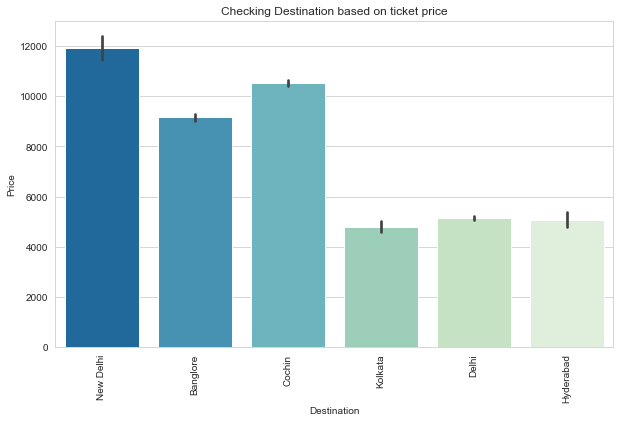

In [179]:
plt.figure(figsize=(10,6))
sns.barplot(df['Destination'],df['Price'],data=df,palette='GnBu_r')
plt.title("Checking Destination based on ticket price")
plt.xticks(rotation=90)
plt.show()

The ticket price is high in new delhi and Cochin destination followed by Bangalore.



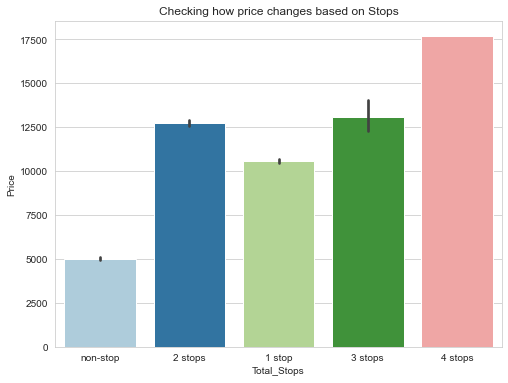

In [194]:
# Let's check the price vs total stops

plt.figure(figsize=(8,6))
sns.barplot(df['Total_Stops'],df['Price'],data=df,palette='Paired')
plt.title("Checking how price changes based on Stops")
plt.show()

We can see flights with 4 stops have highest price followed by flights having 3 stops and the flights which have no stops is having very less ticket price compared to others.



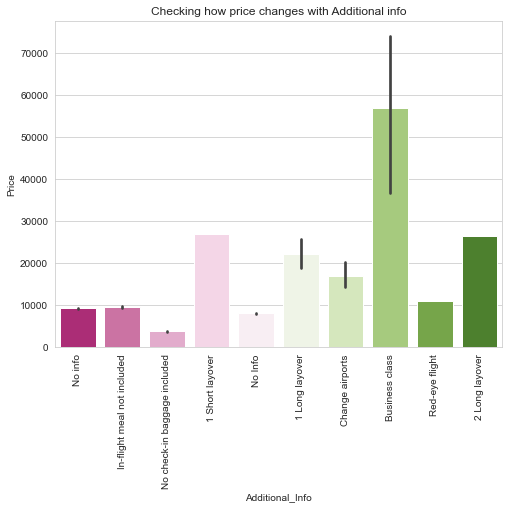

In [197]:
# Let's check the Additional_info and price 

plt.figure(figsize=(8,6))
sns.barplot(df['Additional_Info'],df['Price'],data=df,palette='PiYG')
plt.title("Checking how price changes with Additional info")
plt.xticks(rotation=90)
plt.show()

This plot shows that the Business class flights are more expensive compared to others and the flights having the class No check-in baggage included has very least ticket price.



<AxesSubplot:xlabel='Dep_Hour', ylabel='Price'>

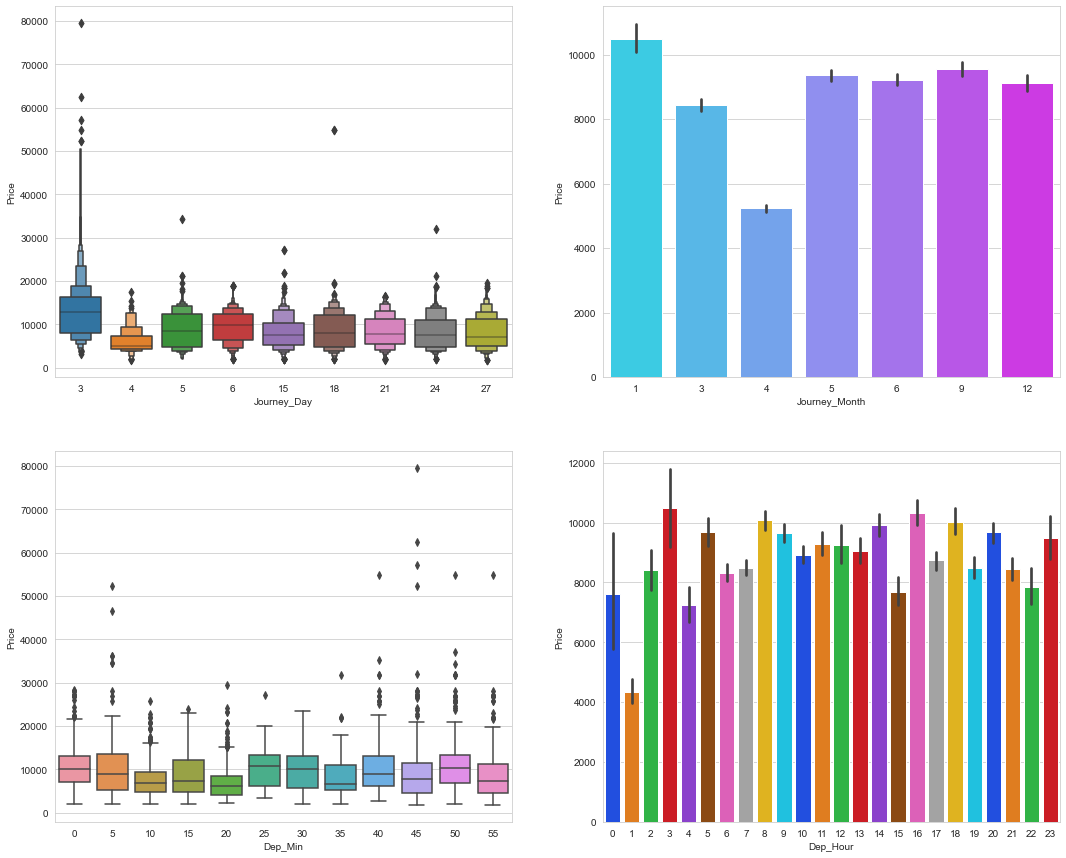

In [199]:
fig,axes=plt.subplots(2,2,figsize=(18,15))


# Checking relation between Journey_Day and Price
sns.boxenplot(x='Journey_Day',y='Price',ax=axes[0,0],data=df)

# Checking relation between Journey_Mionth and Price
sns.barplot(x='Journey_Month',y='Price',ax=axes[0,1],data=df,palette='cool')

# Checking relation between Dep_Min and Price
sns.boxplot(x='Dep_Min',y='Price',ax=axes[1,0],data=df)

# Checking relation between Dep_Hour and Price
sns.barplot(x='Dep_Hour',y='Price',ax=axes[1,1],data=df,palette="bright")

From the above plots we can observe the following

.While comparing Journey_Day and Price we can see the price of ticket is high in Day 3 apart from this there is no much impact of day on ticket price.

.While comparing Journey_Month and Price we can state that the flights travelling in January month are more expensive than others and the flights traveeling in April month have very cheap ticket prices.

.There is no significance relation between Dep_Min and Price of the tickets.

.In the fourth graph also we can say that there is no much impact of Dep_Hour on Price.

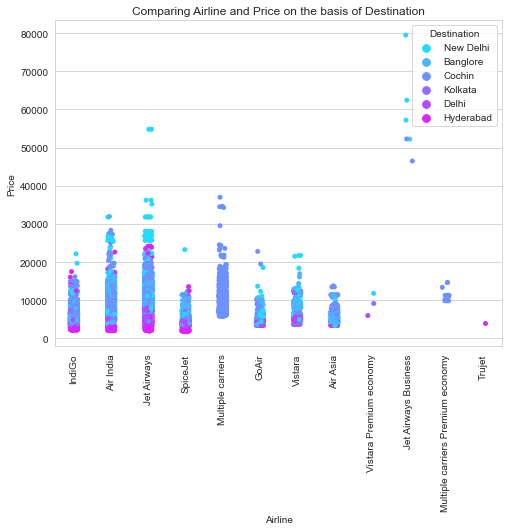

In [202]:
# Checking how the price pays role in Airline on the basis of destination

plt.figure(figsize=(8,6))
sns.stripplot(x=df['Airline'],y=df['Price'],hue=df['Destination'],data=df,palette='cool')
plt.title("Comparing Airline and Price on the basis of Destination")
plt.xticks(rotation=90)
plt.show()

Here we can conclude that the JetAirways flights  are destined to Delhi are having more expensive ticket prices compared to others.



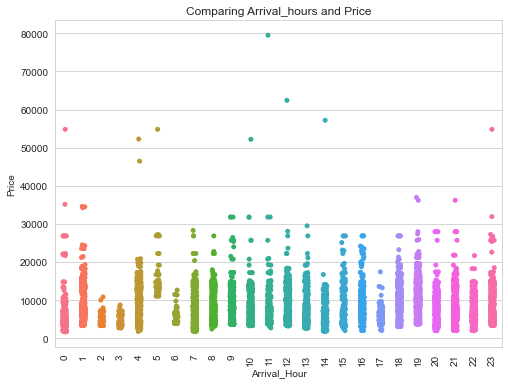

In [203]:
#Checking relation between Arrival_Hour and Price

plt.figure(figsize=(8,6))
sns.stripplot(x=df['Arrival_Hour'],y=df['Price'],data=df,palette='husl')
plt.title("Comparing Arrival_hours and Price")
plt.xticks(rotation=90)
plt.show()

And we can see there is no relation of Arrival_time with the Price.



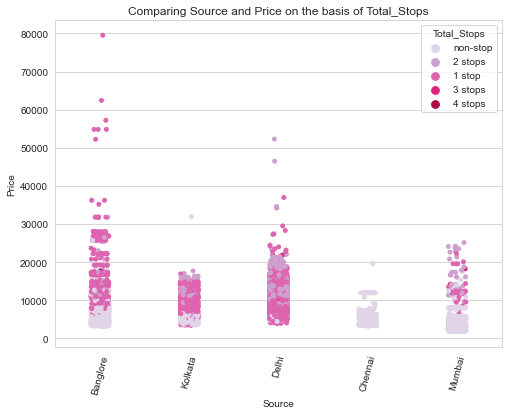

In [205]:
# Checking how the price pays role in Source on the basis of Total_Stops
plt.figure(figsize=(8,6))
sns.stripplot(x=df['Source'],y=df['Price'],hue=df["Total_Stops"],palette='PuRd')
plt.title("Comparing Source and Price on the basis of Total_Stops")
plt.xticks(rotation=75)
plt.show()

As we can say that the flights in the Bangalore source which have only one stop between source and detination are very expensive while Chennai with no stops have very cheap prices compared to other source flights.



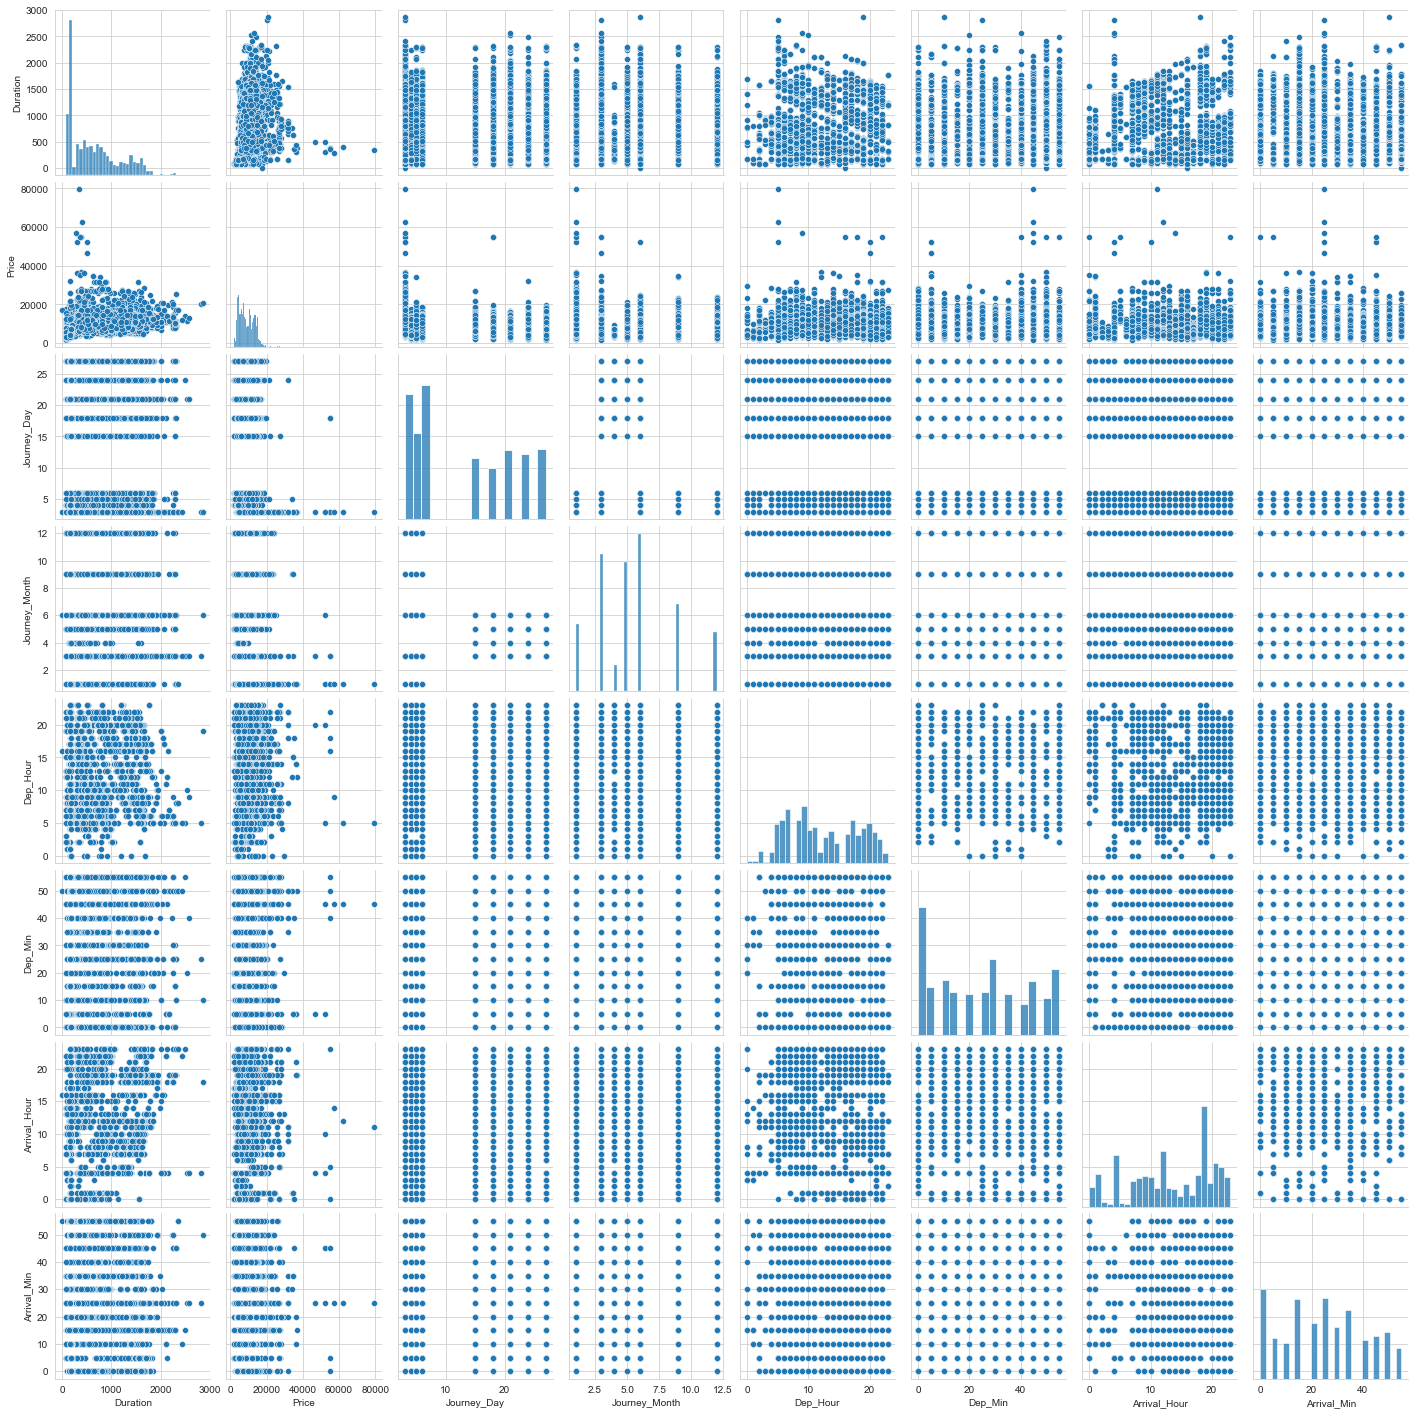

In [215]:
sns.pairplot(df,palette='tab20b_r')

.This .pairplot gives the pairwise relation betweeen the columns which is plotted on the basis of target variable "Price". Here we can observe the relation between the features and the label.

.Here we can observe the correlation between the features and on the diagonal we can notice the distribution plot which shows whether the columns has skewness or not.

.We can also see the linear relation between the features.

# Outliers

Duration             AxesSubplot(0.125,0.71587;0.352273x0.16413)
Price             AxesSubplot(0.547727,0.71587;0.352273x0.16413)
Journey_Day         AxesSubplot(0.125,0.518913;0.352273x0.16413)
Journey_Month    AxesSubplot(0.547727,0.518913;0.352273x0.16413)
Dep_Hour            AxesSubplot(0.125,0.321957;0.352273x0.16413)
Dep_Min          AxesSubplot(0.547727,0.321957;0.352273x0.16413)
Arrival_Hour           AxesSubplot(0.125,0.125;0.352273x0.16413)
Arrival_Min         AxesSubplot(0.547727,0.125;0.352273x0.16413)
dtype: object

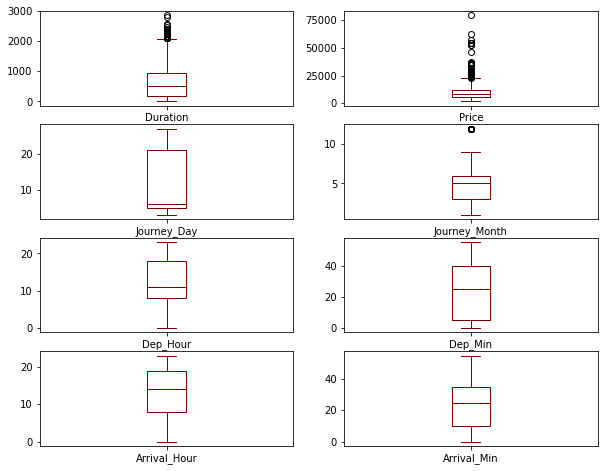

In [25]:
#Identifing the outliers
#plot for outliers

df.plot(kind='box',subplots=True,layout=(4,2),figsize=(10,8),color='maroon') 

.The outliers are present in the columns 
"Duration","Journey_Month" and the target variable "Price".

.Since "Price" is the target column so no need to remove outliers from this column.

# Removing Outliers
Zscore method

In [68]:
from scipy.stats import zscore

features=df[['Duration','Journey_Month']]
z=np.abs(zscore(features))
z

array([[0.93158255, 0.84850298],
       [0.39007152, 1.5179928 ],
       [0.97847452, 1.15996647],
       ...,
       [0.91189124, 0.51375808],
       [0.95127386, 1.5179928 ],
       [0.28176932, 1.15996647]])

In [69]:
#Removing the outliers
new_df=df[(z<3).all(axis=1)]
new_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,150,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,180,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,160,non-stop,No info,12648,3,1,11,30,14,10


This is the new dataframe after removing outliers. Here we have removed the outliers whose zscore is less than 3.



In [70]:
#Checking the dimension of both dataset
print(df.shape)
print(new_df.shape)

(10683, 14)
(10617, 14)


In [71]:
#Checking the data loss
loss=(10683-10617)/10683*100
loss

0.6178039876439202

Here we are losing very less data.

# Checking the skewness

In [72]:
new_df.skew()

Duration         0.774266
Price            1.824502
Journey_Day      0.367029
Journey_Month    0.628224
Dep_Hour         0.103798
Dep_Min          0.164551
Arrival_Hour    -0.361250
Arrival_Min      0.107805
dtype: float64

.Skewness threshold is taken as +/-0.65.

.We can find the skewnwss present in Price, Duration and Journey_Month columns.

.As Price is the target column no need to remove skewness from that column but will remove skewness from the other two columns.

# Removing Skewness using log transformation


In [73]:
new_df['Duration']=np.log1p(new_df['Duration'])
new_df['Journey_Month']=np.log1p(new_df['Journey_Month'])

In [74]:
#checking skewness again
new_df.skew()

Duration        -0.178335
Price            1.824502
Journey_Day      0.367029
Journey_Month   -0.533689
Dep_Hour         0.103798
Dep_Min          0.164551
Arrival_Hour    -0.361250
Arrival_Min      0.107805
dtype: float64

We can observe the skewness has been removed from Duration and Journey_Month columns.



# Label Encoding Categorical data


In [75]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_df[categorical_col]=new_df[categorical_col].apply(le.fit_transform)
new_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,5,18,5.141664,4,8,3897,24,1.386294,22,20,1,10
1,1,3,0,84,6.100319,1,8,7662,5,0.693147,5,50,13,15
2,4,2,1,118,7.039660,1,8,13882,6,2.302585,9,25,4,25
3,3,3,0,91,5.786897,0,8,6218,5,2.564949,18,5,23,30
4,3,0,5,29,5.655992,0,8,13302,3,0.693147,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,5.017280,4,8,4107,4,2.302585,19,55,22,25
10679,1,3,0,64,5.049856,4,8,4145,27,1.609438,20,45,23,20
10680,4,0,2,18,5.198497,4,8,7229,27,1.609438,8,20,11,20
10681,10,0,5,18,5.081404,4,8,12648,3,0.693147,11,30,14,10


We have converted the categorical columns into numerical columns using label encoder.



# correlation

In [76]:
#checking the correlation b/w features and label
new_df.corr()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.013644,0.018738,0.028401,-0.122143,0.035669,-0.058385,-0.036874,0.030219,-0.001278,-0.041977,-0.061477,-0.002555,-0.073921
Source,-0.013644,1.000000,-0.592476,0.404009,0.122739,-0.225922,-0.022073,0.016718,0.007158,0.062011,0.059469,-0.055929,0.026144,0.021640
Destination,0.018738,-0.592476,1.000000,-0.459858,-0.338608,0.338653,0.026644,-0.072290,-0.051120,-0.116550,-0.074274,0.127062,-0.040261,0.016555
Route,0.028401,0.404009,-0.459858,1.000000,0.368475,-0.439372,0.035007,0.163635,0.096042,0.076196,-0.070005,-0.066420,0.011514,-0.174071
Duration,-0.122143,0.122739,-0.338608,0.368475,1.000000,-0.809980,-0.183427,0.605786,-0.042848,0.061807,-0.001689,-0.033797,0.056730,-0.125315
Total_Stops,0.035669,-0.225922,0.338653,-0.439372,-0.809980,1.000000,0.164404,-0.572413,0.043711,-0.048791,0.038512,0.049105,-0.095213,0.176915
Additional_Info,-0.058385,-0.022073,0.026644,0.035007,-0.183427,0.164404,1.000000,-0.067376,-0.018081,0.001279,-0.049825,-0.019279,0.025208,0.043422
Price,-0.036874,0.016718,-0.072290,0.163635,0.605786,-0.572413,-0.067376,1.000000,-0.163765,-0.013511,0.011430,-0.025585,0.021107,-0.088909
Journey_Day,0.030219,0.007158,-0.051120,0.096042,-0.042848,0.043711,-0.018081,-0.163765,1.000000,-0.097582,-0.002628,-0.017421,-0.001501,-0.021901
Journey_Month,-0.001278,0.062011,-0.116550,0.076196,0.061807,-0.048791,0.001279,-0.013511,-0.097582,1.000000,0.020587,-0.005264,-0.005743,-0.031453


This gives the correlation between the dependent and independent variables. We can visualize this by plotting heatmap.



<AxesSubplot:>

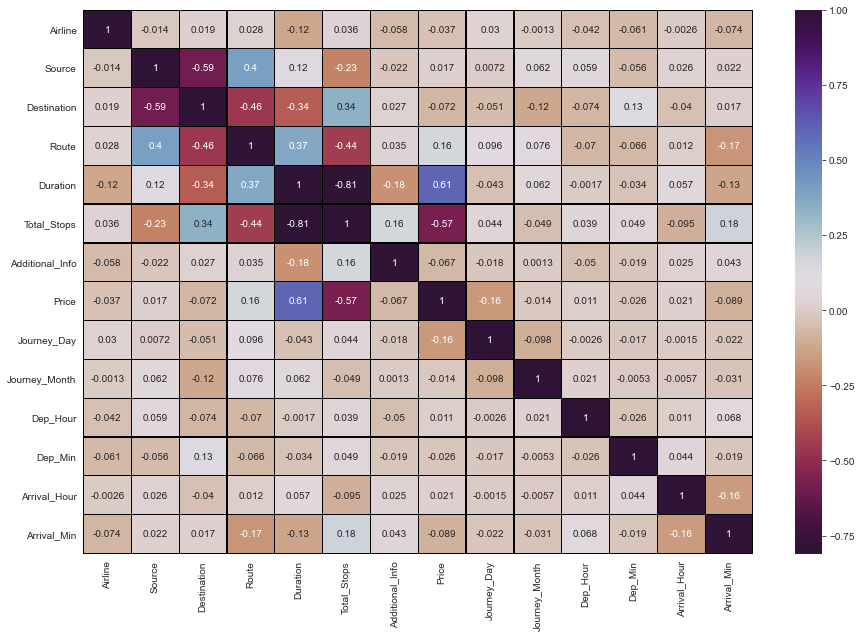

In [77]:
#Heatmap for correaltion
plt.figure(figsize=(15,10))
sns.heatmap(new_df.corr(),annot=True,cmap='twilight_shifted_r',linecolor='black',linewidths=0.2)

This heatmap shows the correaltion matrix by visualizing the data. We can observe the relation between one feature to other.

.This heatmap contain both positive and negative correlation.

.The feature Duration is highly positively correlated with the target variable "Price".

.The feature Total_Stops is highly Negatively correlated with the label.

.The features Duration, Total_Stops and Destination are highly negatively correlated with each other.This may lead to multicollinearity problem, we will check vif values to avoid this.

# Visualizing the correlation between features and label using bar plot.


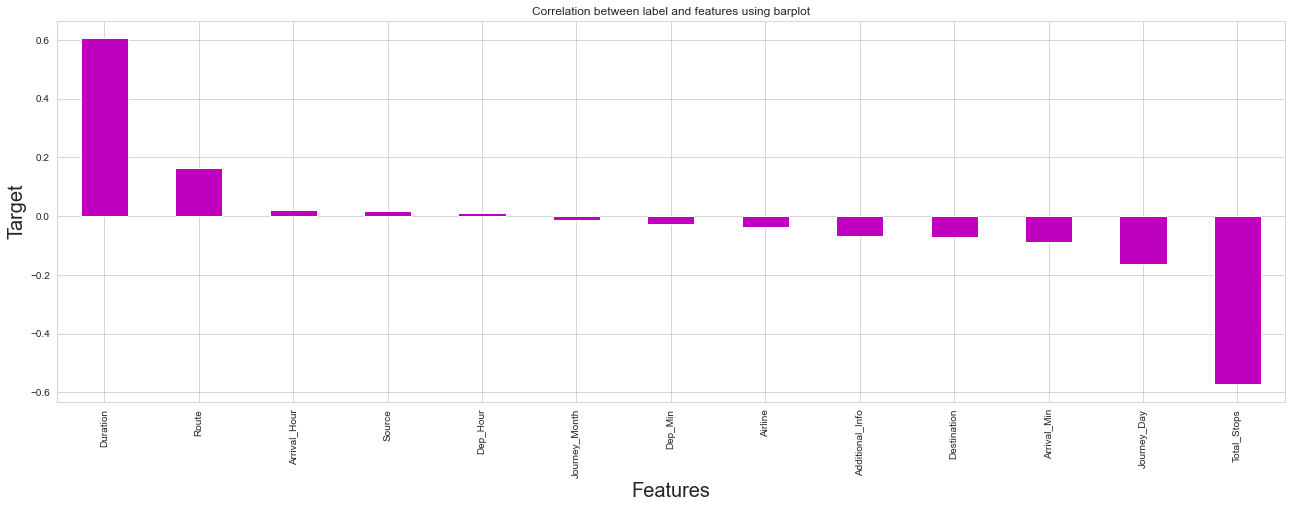

In [265]:
plt.figure(figsize=(22,7))
new_df.corr()["Price"].sort_values(ascending=False).drop(["Price"]).plot(kind="bar",color="m")
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation between label and features using barplot')
plt.show()

The features Journey_Month, Source, Arrival_Hour,Dep_Hour and Airline have very less correlation with the label so we can drop these columns.



# Separating the features and label.


In [78]:
x=new_df.drop('Price',axis=1)
y=new_df['Price']

In [79]:
x.shape

(10617, 13)

In [80]:
y.shape

(10617,)

# Feature Scaling using Standard Scalarization


In [81]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,-0.416258,-1.655042,2.413090,-1.544003,-1.058285,1.402360,0.500803,1.286176,-0.754967,1.649475,-0.235894,-1.794784,-0.889208
1,-1.266881,0.888124,-0.972992,0.254498,0.007344,-0.253797,0.500803,-0.873920,-2.141814,-1.312186,1.362715,-0.046050,-0.586465
2,0.009053,0.040402,-0.295776,1.180998,1.051504,-0.253797,0.500803,-0.760231,1.078344,-0.615325,0.030541,-1.357601,0.019019
3,-0.416258,0.888124,-0.972992,0.445248,-0.341051,-0.805850,0.500803,-0.873920,1.603281,0.952614,-1.035199,1.411228,0.321762
4,-0.416258,-1.655042,2.413090,-1.244253,-0.486564,-0.805850,0.500803,-1.101299,-2.141814,0.604183,1.362715,1.119772,0.624504
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10612,-1.692192,0.888124,-0.972992,-0.290502,-1.196549,1.402360,0.500803,-0.987609,1.078344,1.126829,1.629150,1.265500,0.019019
10613,-1.266881,0.888124,-0.972992,-0.290502,-1.160337,1.402360,0.500803,1.627244,-0.308502,1.301044,1.096280,1.411228,-0.283723
10614,0.009053,-1.655042,0.381441,-1.544003,-0.995110,1.402360,0.500803,1.627244,-0.308502,-0.789540,-0.235894,-0.337506,-0.283723
10615,2.560922,-1.655042,2.413090,-1.544003,-1.125269,1.402360,0.500803,-1.101299,-2.141814,-0.266894,0.296976,0.099677,-0.889208


We have scaled the data using Standard Scalarization method to overcome the problem of biasness.



# Checking the Multicolinearity

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,1.051150,Airline
1,1.696675,Source
2,1.870265,Destination
3,1.591512,Route
4,3.222883,Duration
5,3.289570,Total_Stops
6,1.071281,Additional_Info
7,1.037236,Journey_Day
8,1.028408,Journey_Month
9,1.030690,Dep_Hour


As we can notice the vif values is less than 10 in all the columns,there is no multicollinearity exists. WE can move ahead for model building.



# Modeling
Finding the best random state

In [83]:
from sklearn.model_selection import train_test_split
maxAcc=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.30,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
print("Maximum r2_score is ",maxAcc,"at random_state",maxRs)    


Maximum r2_score is  0.9210909654517284 at random_state 180


# Creating new train_test_split


In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)


# Random Forest Regressor


In [49]:
# Checking R2 score for RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("R2_score:",r2_score(y_test,pred))
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE:",mean_squared_error(y_test,pred))
print("RSME:",np.sqrt(mean_squared_error(y_test,pred)))


R2_score: 0.9225441535893967
MAE: 615.2297623606254
MSE: 1416384.506077884
RSME: 1190.1195343653023


# Decision Tree Regressor


In [50]:
# Checking R2 score for DecisionTree
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("R2_score:",r2_score(y_test,pred))
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE:",mean_squared_error(y_test,pred))
print("RSME:",np.sqrt(mean_squared_error(y_test,pred)))


R2_score: 0.8587440321771915
MAE: 670.7745082653274
MSE: 2583055.682519443
RSME: 1607.188751366635


# GradientBoostingRegressor

In [51]:
# Checking R2 score for GradientBoostingRegressor
gb= GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred =gb.predict(x_test)
print("R2_score:",r2_score(y_test,pred))
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE:",mean_squared_error(y_test,pred))
print("RSME:",np.sqrt(mean_squared_error(y_test,pred)))


R2_score: 0.8429357704684995
MAE: 1196.3427457861794
MSE: 2872131.045966125
RSME: 1694.7362762288783


# ExtraTreesRegressor


In [85]:
# Checking R2 score for ExtraTreesRegressor
et= ExtraTreesRegressor()
et.fit(x_train,y_train)
pred =et.predict(x_test)
print("R2_score:",r2_score(y_test,pred))
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE:",mean_squared_error(y_test,pred))
print("RSME:",np.sqrt(mean_squared_error(y_test,pred)))


R2_score: 0.9256587669430303
MAE: 584.471120265746
MSE: 1359429.6046605771
RSME: 1165.9457983373743


# LinearRegression

In [53]:
# Checking R2 score for ExtraTreesRegressor
lr= LinearRegression()
lr.fit(x_train,y_train)
pred =lr.predict(x_test)
print("R2_score:",r2_score(y_test,pred))
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE:",mean_squared_error(y_test,pred))
print("RSME:",np.sqrt(mean_squared_error(y_test,pred)))


R2_score: 0.4983140849153792
MAE: 2331.280649660851
MSE: 9174002.86708489
RSME: 3028.8616454181083


# Checking the cross validation score


In [87]:
from sklearn.model_selection import cross_val_score

In [55]:
# cv score for RandomForest Regressor
print(cross_val_score(rf,x,y,cv=5).mean())

0.8734880484766508


In [56]:
# cv score for DecisionTree
print(cross_val_score(dt,x,y,cv=5).mean())

0.8012536277170355


In [57]:
# cv score for LinearRegressor
print(cross_val_score(lr,x,y,cv=5).mean())

0.43499964017583725


In [58]:
# cv score for GradientBoosting
print(cross_val_score(gb,x,y,cv=5).mean())

0.8212149694650343


In [91]:
# cv score for ExtraTreeRegressor
print(cross_val_score(et,x,y,cv=7).mean())

0.9022632006017484


ExtraTreesRegressor model have highest accuracy i.e. 92.56% with 90.22% cross validation score which is good and the difference is too less



# Hyperparameter tuning


In [61]:
#ExtraTreesRegressor

from sklearn.model_selection import GridSearchCV


parameters = {'criterion' : ['mse','mae'],
    'max_features': ['auto','sqrt','log2'],    
            'max_depth' : [0,2,8,10,15,20],
                'bootstrap': [True, False],
              'n_estimators' : [10,50,100]}
gcv=GridSearchCV(ExtraTreesRegressor(),parameters,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'],
                         'max_depth': [0, 2, 8, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]})

In [62]:
gcv.best_params_

{'bootstrap': False,
 'criterion': 'mae',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 100}

In [99]:
Final_model=ExtraTreesRegressor(criterion='mae',max_features='auto',max_depth=20,bootstrap='False',n_estimators=100)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
print('R2_Score',r2_score(y_test,pred))
print('RMSE Value',np.sqrt(mean_squared_error(y_test,pred)))
print('MSE',mean_squared_error(y_test,pred))

R2_Score 0.9219200606561315
RMSE Value 1194.9045510786743
MSE 1427796.886188528


After tuning, the best R2 score is 92.19%.



# saving the model

In [100]:
#saving the model using pkl
joblib.dump(Final_model,'Flight_Prediction.pkl')

['Flight_Prediction.pkl']

# Predicting the saved model


In [101]:
#Loading the save model
Model=joblib.load('Flight_Prediction.pkl')

#prediction
a = np.array(y_test)
predicted = np.array(Model.predict(x_test))
df_com = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_com


,Original,Predicted
0,13292,13255.290
1,6206,7321.105
2,4804,4638.100
3,10151,9857.870
4,18275,18487.890
...,...,...
3181,6144,6464.545
3182,4804,4790.630
3183,8016,7547.285
3184,14323,13246.615


# Prediction Visualization


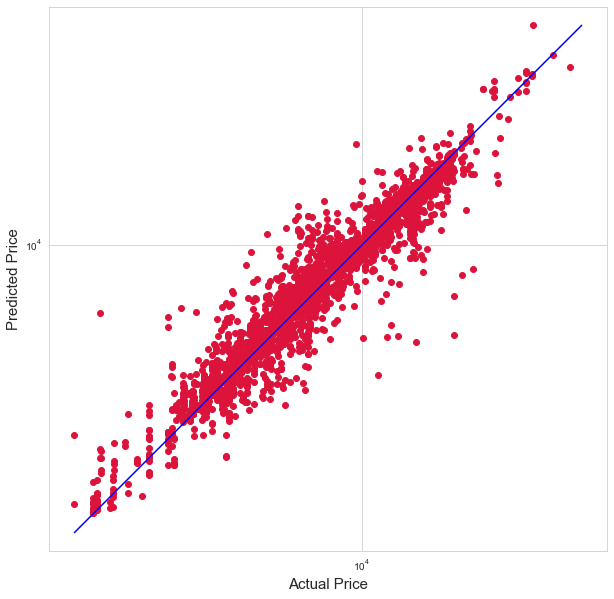

In [102]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,predicted,c='crimson')
plt.yscale('log')
plt.xscale('log')
p1=max(max(predicted),max(y_test))
p2=min(min(predicted),min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price', fontsize=15)
plt.axis('equal')
plt.show()

# Test Data


# Importing Test data

In [3]:
#Reading the excel file
test_df=pd.read_excel('C:/Users/hp/OneDrive/Documents/Test_set.xlsx')
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [4]:
#checkign the top 5rows
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


This test dataset has no target variable, we need to use trained data to get the ticket price prediction.



In [5]:
#checking the last 5 rows
test_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


In [6]:
#checking the dimension of data
test_df.shape

(2671, 10)

In [7]:
#checking the columns
test_df.columns.tolist()

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [8]:
#Checking the type of columns
test_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

All columns have object datatype. We will convert them to numeric data format using encoder.



# Feature Engineering
The columns Date_of_Journey, Dep_Time and Arrival_Time showing object datatype.

As the data in it is datetime format, we have to convert it to timestamp for proper prediction.

In [9]:
# Converting Date and Time columns from object type to Date type
test_df['Date_of_Journey']=pd.to_datetime(test_df['Date_of_Journey'])
test_df['Dep_Time']=pd.to_datetime(test_df['Dep_Time'])
test_df['Arrival_Time']=pd.to_datetime(test_df['Arrival_Time'])

In [10]:
#checking again dtypes

test_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object

Now splitting Date_of_journey into Month and Day, and as the dataset contains only 2019 year data so no need to take year column



In [11]:
# Extracting Day from Date_of_journey column
test_df['Journey_Day'] = pd.to_datetime(test_df.Date_of_Journey,format="%d/%m/%Y").dt.day

# Extracting Month from Date_of_journey column
test_df['Journey_Month'] = pd.to_datetime(test_df.Date_of_Journey, format="%d/%m/%Y").dt.month


So we have splitted the column Date_of_Journey into integer datatype , now we can drop this column as it is of no use.



In [12]:
# Dropping Date_of_journey column
test_df.drop("Date_of_Journey",axis=1,inplace=True)

In [13]:
#Duration

test_df['Duration']=test_df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

#now lets convert this column into a numeric

test_df['Duration']=pd.to_numeric(test_df['Duration'])

Extracting hours and mins from Arrival_Time column and dropping that column.



In [14]:
# Extracting Hours from Dep_Time column
test_df['Dep_Hour']=pd.to_datetime(test_df['Dep_Time']).dt.hour

# Extracting Minutes from Dep_Time column
test_df['Dep_Min']=pd.to_datetime(test_df['Dep_Time']).dt.minute

In [15]:
# Dropping Dep_Time column
test_df.drop("Dep_Time",axis=1,inplace=True)

Similarly extracting hours and mins from Arrival_Time column and dropping that column.



In [16]:
# Extracting Arrival_Hour from Arrival_Time column
test_df['Arrival_Hour']=pd.to_datetime(test_df['Arrival_Time']).dt.hour

# Extracting Arrival_Min from Arrival_Time column
test_df['Arrival_Min']=pd.to_datetime(test_df['Arrival_Time']).dt.minute

# Dropping Arruval_Time column
test_df.drop("Arrival_Time",axis=1,inplace=True)

In [17]:
#checking test data again
test_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info,24,6,23,55,2,45


In [18]:
#Checking the dimension
test_df.shape

(2671, 13)

In [19]:
#Checking the value count
for i in test_df.columns:
    print(test_df[i].value_counts())
    print('\n')

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64


Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD                      164
                              ... 
BLR → GAU → DEL                  1
BLR → BOM → IDR → 

In [20]:
#checking the unique values
test_df.nunique()

Airline             11
Source               5
Destination          6
Route              100
Duration           320
Total_Stops          5
Additional_Info      6
Journey_Day          9
Journey_Month        7
Dep_Hour            24
Dep_Min             12
Arrival_Hour        24
Arrival_Min         12
dtype: int64

In [21]:
#checking hte null values
test_df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Journey_Day        0
Journey_Month      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

NO null values present

# Description of Test Dataset


In [22]:
test_df.describe()

,Duration,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,2671.00000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,639.74167,12.026956,5.607263,12.603519,24.891426,13.585174,24.558218
std,502.18693,8.564408,3.042952,5.686673,19.086522,7.040396,16.775436
min,5.00000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,175.00000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,520.00000,6.000000,5.000000,12.000000,25.000000,15.000000,25.000000
75%,915.00000,21.000000,6.000000,18.000000,45.000000,19.000000,35.000000
max,2440.00000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000


# This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

From the above description we can observe the following things

The counts of every column is same which means there are no missing values preent in the dataset.

The mean value is greater than the median(50%) in the columns Journey_Day, Duration_hours and Dep_Hour so we can say they are skewed to right.

The median(50%) is bit greater than mean in Duration_mins, Dep_Min, Arrival_Hour and Arrival_Min which means they are skewed to left.

In summarizing the data we can observe that there is bit differences between 75% and max which means some outliers present in the data.

In [23]:
# checking for categorical columns
categorical_col=[]
for i in test_df.dtypes.index:
    if test_df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


# Identifying outliers


Duration             AxesSubplot(0.125,0.71587;0.352273x0.16413)
Journey_Day       AxesSubplot(0.547727,0.71587;0.352273x0.16413)
Journey_Month       AxesSubplot(0.125,0.518913;0.352273x0.16413)
Dep_Hour         AxesSubplot(0.547727,0.518913;0.352273x0.16413)
Dep_Min             AxesSubplot(0.125,0.321957;0.352273x0.16413)
Arrival_Hour     AxesSubplot(0.547727,0.321957;0.352273x0.16413)
Arrival_Min            AxesSubplot(0.125,0.125;0.352273x0.16413)
dtype: object

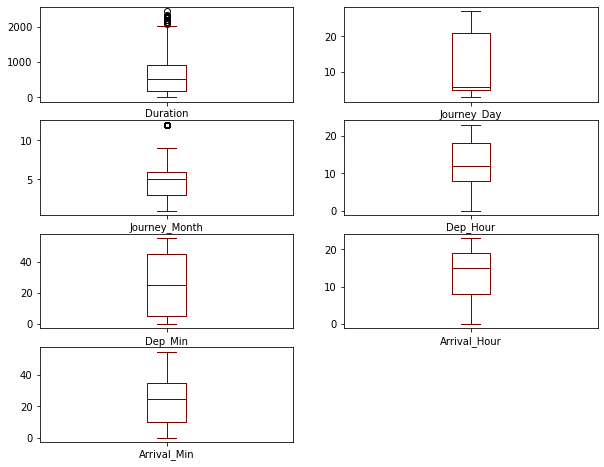

In [24]:
test_df.plot(kind='box',subplots=True,layout=(4,2),figsize=(10,8),color='maroon') 

We can notice outliers in Journey_Month and Duration, lets remove outliers using zscore method.



# Removing Outliers


# Zscore method

In [27]:
from scipy.stats import zscore
features=test_df[['Duration','Journey_Month']]
z=np.abs(zscore(features))
z

array([[0.03038946, 0.12908857],
       [0.79615079, 2.10122721],
       [1.56397015, 0.1996012 ],
       ...,
       [0.48744299, 0.12908857],
       [0.5482219 , 0.12908857],
       [0.43868042, 0.12908857]])

In [28]:
new_test_df=test_df[(z<3).all(axis=1)]
new_test_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1435,1 stop,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,395,1 stop,No info,3,6,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,915,1 stop,No info,3,6,4,0,19,15


We have removed the outliers



In [29]:
#new and old df
print(test_df.shape)
print(new_test_df.shape)


(2671, 13)
(2653, 13)


In [30]:
#checking the data loss
loss=(2671-2653)/2671*100
loss

0.6739049045301385

Here we are losing very less data hence removing outliers.



# Checking skewness

In [31]:
new_test_df.skew()

Duration         0.809826
Journey_Day      0.475210
Journey_Month    0.591565
Dep_Hour         0.083357
Dep_Min          0.132681
Arrival_Hour    -0.432551
Arrival_Min      0.110111
dtype: float64

# Removing the skewness

In [32]:
#Removing skewness using log transformation
new_test_df["Duration"]=np.log1p(new_test_df["Duration"])
new_test_df["Journey_Month"]=np.log1p(new_test_df["Journey_Month"])


In [33]:
#ckecking the skewness again
new_test_df.skew()

Duration        -0.229080
Journey_Day      0.475210
Journey_Month   -0.541053
Dep_Hour         0.083357
Dep_Min          0.132681
Arrival_Hour    -0.432551
Arrival_Min      0.110111
dtype: float64

skewness has been removed

# Encoding Categorical data


In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_test_df[categorical_col]=new_test_df[categorical_col].apply(le.fit_transform)
new_test_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,4,2,1,76,6.486161,0,5,6,1.945910,17,30,4,25
1,3,3,0,65,5.484797,0,5,5,2.564949,6,20,10,20
2,4,2,1,76,7.262629,0,3,21,1.791759,19,15,19,0
3,6,2,1,76,6.660575,0,5,21,1.791759,8,0,21,0
4,0,0,2,16,5.141664,4,5,24,1.945910,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,7.269617,0,5,6,1.945910,20,30,20,25
2667,3,3,0,43,5.049856,4,5,27,1.386294,14,20,16,55
2668,4,2,1,76,5.981414,0,5,3,1.945910,21,50,4,25
2669,1,2,1,76,6.820016,0,5,3,1.945910,4,0,19,15


We have converted the categorical columns into numerical columns using label encoding method.



# Feature Scaling using Standard Scalarization

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_test_df = pd.DataFrame(scaler.fit_transform(new_test_df),columns=new_test_df.columns)
new_test_df


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,0.004605,0.031440,-0.294562,0.804966,0.438880,-0.791072,0.481212,-0.706193,0.344970,0.766320,0.272445,-1.354818,0.025591
1,-0.431683,0.873978,-0.975287,0.398570,-0.681421,-0.791072,0.481212,-0.823069,1.565339,-1.172433,-0.252462,-0.503215,-0.272182
2,0.004605,0.031440,-0.294562,0.804966,1.307572,-0.791072,-2.145650,1.046954,0.041078,1.118821,-0.514916,0.774190,-1.463273
3,0.877180,0.031440,-0.294562,0.804966,0.634010,-0.791072,0.481212,1.046954,0.041078,-0.819933,-1.302277,1.058057,-1.463273
4,-1.740546,-1.653635,0.386163,-1.411740,-1.065309,1.429790,0.481212,1.397583,0.344970,1.823822,1.584714,-1.638686,1.216682
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,-1.304259,0.873978,-0.975287,-0.118662,1.315390,-0.791072,0.481212,-0.706193,0.344970,1.295071,0.272445,0.916123,0.025591
2649,-0.431683,0.873978,-0.975287,-0.414222,-1.168021,1.429790,0.481212,1.748212,-0.758252,0.237569,-0.252462,0.348388,1.812227
2650,0.004605,0.031440,-0.294562,0.804966,-0.125818,-0.791072,0.481212,-1.056822,0.344970,1.471321,1.322260,-1.354818,0.025591
2651,-1.304259,0.031440,-0.294562,0.804966,0.812389,-0.791072,0.481212,-1.056822,0.344970,-1.524934,-1.302277,0.774190,-0.569955


We have scaled the data using StandardScalarization method to overcome with the issue of biasness.

As we have already loaded the saved model after saving the final model. Now let's predict the flight price using test data

# Prediction Result

In [103]:
#predicting the flight price from the features of the testing data

predicted_price=Model.predict(new_test_df)
predicted_price

array([14406.07,  4448.4 , 13847.82, ..., 14571.52, 11683.54,  7907.56])

Here we are using predicted final model which is saved as Model to predict the price of the test dataset.


# Creating DataFrame and Saving the Predictions

In [105]:
Prediction = pd.DataFrame()
Prediction['Price'] = predicted_price
Prediction

,Price
0,14406.07
1,4448.40
2,13847.82
3,10950.47
4,3725.19
...,...
2648,9718.41
2649,5052.82
2650,14571.52
2651,11683.54


In [106]:
#saving the predictions
Prediction.to_csv("Predicted_Flight_Price_Data.csv",index=False)


# Conclusion:
The training dataset was containing one continuous value which was our target column 'Price'.

We analysed the dataset and then we performed EDA to understand the data in a better way and have written the observation also.

We performed all the pre-processing from data cleaning to data transformation and also did Feature engineering.


After training multiple regression models, we selected ExtraTreeRegressor as our final model and performed hyperparameter tuning that increased the accuracy

Finally we build a model to predict the flight price with accuracy of 92.56%